<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/Recurrent%20Neural%20Network_Time%20Series_and_Sequence%20Data/RNN_For_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D, SimpleRNN, LSTM
from tensorflow.keras.optimizers import SGD,Adam
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Model

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print('x_train.shape:', x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
i = Input(shape = x_train[0].shape)
x = SimpleRNN(128)(i)
x = Dense(10, activation = 'softmax')(x)

model = Model(i, x)

In [4]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 18s 5ms/step - loss: 0.5762 - accuracy: 0.7875 - val_loss: 0.4638 - val_accuracy: 0.8314
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4014 - accuracy: 0.8515 - val_loss: 0.3966 - val_accuracy: 0.8554
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3568 - accuracy: 0.8680 - val_loss: 0.3853 - val_accuracy: 0.8570
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3275 - accuracy: 0.8795 - val_loss: 0.3571 - val_accuracy: 0.8724
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3044 - accuracy: 0.8879 - val_loss: 0.3359 - val_accuracy: 0.8798
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2866 - accuracy: 0.8934 - val_loss: 0.3277 - val_accuracy: 0.8819
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2731 - accuracy: 0.8974 - val_loss: 0.3251 - val_acc

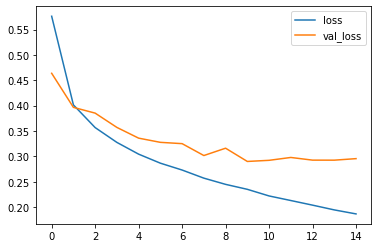

In [5]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

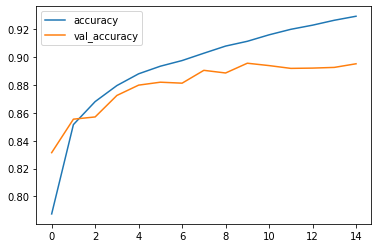

In [6]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

Confusion matrix, wihtout normalization
[[832   5  18  29   5   1 103   0   7   0]
 [  2 979   0  11   3   0   3   0   2   0]
 [ 14   3 782  10 124   1  64   0   2   0]
 [ 14   5  15 901  46   0  12   0   7   0]
 [  1   1  52  19 877   0  49   0   1   0]
 [  0   0   0   1   0 975   0  13   1  10]
 [ 99   5  50  35  98   1 702   0  10   0]
 [  0   0   0   0   0  12   0 969   0  19]
 [  4   0   2   3   6   3   2   3 977   0]
 [  0   0   0   1   0   4   1  37   0 957]]


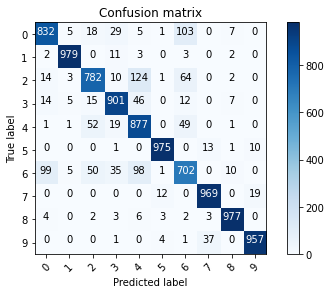

In [7]:
def plot_confusion_matirx(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    print("Normalized confusion matrix")

  else:

    print('Confusion matrix, wihtout normalization')

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt), horizontalalignment = 'center', color = 'white' if cm[i,j]>thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matirx(cm, list(range(10)))


In [8]:
labels = '''T-shrit/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()


Text(0.5, 1.0, 'True label: Pullover predicted: T-shrit/top')

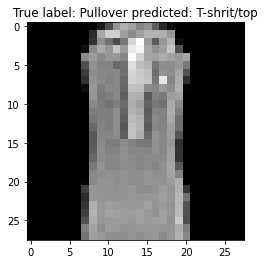

In [9]:
misclassfied_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassfied_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True label: %s predicted: %s' %(labels[y_test[i]], labels[p_test[i]]))